# Data Mining and Exploration (INFR 11007)

## First Steps in EDA

### Numerical data description

In [1]:
import numpy as np
import pandas as pd

In [2]:
set1 = np.array([0, 1, 1, 1, 2, 3, 4, 4, 5, 9])
set2 = np.array([0, 1, 1, 1, 2, 3, 4, 4, 5, 9000])
print('Set 1: {}'.format(set1))
print('Set 2: {}'.format(set2))

Set 1: [0 1 1 1 2 3 4 4 5 9]
Set 2: [   0    1    1    1    2    3    4    4    5 9000]


#### Location

**Not-robust measures:**
- Sample mean: $\displaystyle \bar x = \frac{1}{n} \sum_{i=1}^n x_i$
    - Estimator of the mean of r.v. $X$
    
**Robust measures:**
- Median: $\displaystyle \mathrm{median}(x) = \begin{cases}
    x_{(\frac{n+1}{2})} & \text{if } n \text{ is odd} \\
    \frac{1}{2} \left( x_{(\frac{n}{2})} + x_{(\frac{n}{2}+1)} \right) & \text{if } n \text{ is even}
\end{cases}$
- Mode: the value that occurs most frequently
- Quantile: $q_\alpha \approx x_{(\lceil n\alpha \rceil)}$
    - $Q_1 = q_{0.25}$, $Q_2 = q_{0.5}$, $Q_3 = q_{0.75}$

In [3]:
d = {
    'mean': [set1.mean(), set2.mean()], 
    'median': [np.median(set1), np.median(set2)], 
    '$Q_1$': [np.quantile(set1, 0.25), np.quantile(set2, 0.25)], 
    '$Q_2$': [np.quantile(set1, 0.5), np.quantile(set2, 0.5)], 
    '$Q_3$': [np.quantile(set1, 0.75), np.quantile(set2, 0.75)]
}
pd.DataFrame(data=d, index=['Set 1','Set 2'])

,mean,median,$Q_1$,$Q_2$,$Q_3$
Set 1,3.0,2.5,1.0,2.5,4.0
Set 2,902.1,2.5,1.0,2.5,4.0


#### Scale

**Not-robust measures:**
- Sample variance: $\displaystyle \mathrm{Var}(x) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2$
    - Estimator of the variance of r.v. $X$
- Sample standard deviation: $\mathrm{std}(x) = \sqrt{\mathrm{Var}(x)}$

**Robust measures:**
- Median absolute deviation: $\mathrm{MAD}(x) = \mathrm{median}(|x_i - \mathrm{median}(x)|)$
- Interquantile range: $\mathrm{IQR} = Q_3 - Q_1$

In [12]:
from scipy.stats import iqr

def mad(x):
    return np.median(np.abs(x - np.median(x)))

In [13]:
d = {
    'variance': [set1.var(), set2.var()], 
    'std': [set1.std(), set2.std()], 
    'MAD': [mad(set1), mad(set2)], 
    'IQR': [iqr(set1), iqr(set2)]
}
pd.DataFrame(data=d, index=['Set 1','Set 2'])

,variance,std,MAD,IQR
Set 1,6.40,2.529822,1.5,3.0
Set 2,7286222.89,2699.300445,1.5,3.0


#### Shape

**Not-robust measures:**
- Sample skewness: $\displaystyle \mathrm{skew}(x) = \frac{1}{n} \sum_{i=1}^n \left( \frac{x_i - \bar x}{\mathrm{std}(x)} \right)^3$
    - Location and scale are not taken into account
- Sample kurtosis: $\displaystyle \mathrm{kurt}(x) = \frac{1}{n} \sum_{i=1}^n \left( \frac{x_i - \bar x}{\mathrm{std}(x)} \right)^4$

**Robust measures:**
- Galton’s measure of skewness: $\displaystyle \frac{(Q_3 - Q_2) - (Q_2 - Q_1)}{Q_3 - Q_1}$
- Robust kurtosis: $\displaystyle \frac{(q_{7/8} - q_{5/8}) + (q_{3/8} - q_{1/8})}{Q_3 - Q_1}$

In [83]:
from scipy.stats import skew, kurtosis

def Galton(x):
    q1 = np.quantile(x, 0.25)
    q2 = np.quantile(x, 0.5)
    q3 = np.quantile(x, 0.75)
    return ((q3-q2)-(q2-q1))/(q3-q1)

def robust_kurt(x):
    q1 = np.quantile(x, 1/8)
    q2 = np.quantile(x, 1/4)
    q3 = np.quantile(x, 3/8)
    q5 = np.quantile(x, 5/8)
    q6 = np.quantile(x, 3/4)
    q7 = np.quantile(x, 7/8)
    return ((q7-q5)+(q3-q1))/(q6-q2)

In [84]:
d = {
    'skewness': [skew(set1), skew(set2)], 
    'Galton': [Galton(set1), Galton(set2)], 
    'kurtosis': [kurtosis(set1), kurtosis(set2)],
    'robustKurt': [robust_kurt(set1), robust_kurt(set2)]
}
pd.DataFrame(data=d, index=['Set 1','Set 2'])

,skewness,Galton,kurtosis,robustKurt
Set 1,1.074680,0.0,0.525391,0.541667
Set 2,2.666665,0.0,5.111106,0.541667


#### Multivariate measures

**Not-robust measures:**
- Sample covariance: $\displaystyle \mathrm{cov}(x,y) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)$
    - Estimator of the covariance of r.v.s $X$ and $Y$
- Pearson's correlation coefficient: $\displaystyle \rho(x, y) = \frac{\mathrm{cov}(x,y)}{\mathrm{std}(x) \mathrm{std}(y)}$
    - $-1 \leq \rho \leq 1$
    - Aka linear correlation coefficient because linear relation is measured. 
    - Nonlinear: $\displaystyle \rho(g(x), g(y)) = \frac{\mathrm{cov}(g(x),g(y))}{\mathrm{std}(g(x)) \mathrm{std}(g(y))}$
- Sample covariance matrix
    - Positive semi-definite
    - Total variance $\displaystyle \sum_{i=1}^d \mathrm{Var}(x_i) = \sum_{i=1}^d \lambda_i$ (by eigenvalue decomopsition $\mathrm{Cov}(\mathbf x) = \mathbf U \boldsymbol\Lambda \mathbf U^\top$)
- Sample correlation matrix: $\displaystyle \rho(\mathbf x) = \mathrm{diag} \left( \frac{1}{\mathrm{std}(\mathbf x)} \right) \mathrm{Cov}(\mathbf x) \mathrm{diag} \left( \frac{1}{\mathrm{std}(\mathbf x)} \right)$

**Robust measures:**
- Kendall's $\tau$: $\displaystyle \tau(x,y) = \frac{n_c(x,y) - n_d(x,y)}{n(n-1)/2}$
    - $n_c(x,y)$ is the number of concordant pairs, i.e. $\#\left\{(x_i, y_i) \text{ and } (x_j, y_j), \forall i \neq j\right\}$ s.t. $\displaystyle \begin{cases}
x_i > x_j \\ 
y_i > y_j
\end{cases} \text{ or } \begin{cases}
x_i < x_j \\
y_i < y_j
\end{cases}$
    - $n_d(x,y)$ is the number of discordant pairs, i.e. $\#\left\{(x_i, y_i) \text{ and } (x_j, y_j), \forall i \neq j\right\}$ s.t. $\displaystyle \begin{cases}
x_i > x_j \\ 
y_i < y_j
\end{cases} \text{ or } \begin{cases}
x_i < x_j \\
y_i > y_j
\end{cases}$
    - If $\begin{cases}
x_i = x_j \\
y_i = y_j
\end{cases}$, the pair is neither concordant nor discordant

### Data visualisation

#### Bar plot

- Number of occurences of an attribute
- More useful to show relevant frequencies 

#### Box plot

- Based on robust measures (quantiles)

<embed src="boxplot.pdf" type="application/pdf" width="500px" height="520px"/>

#### Scatter plot

#### Histogram

$$B_i = [L+(i-1)h, L+ih) \quad i = 1, \ldots, k$$

- To visualise whold dataset, $L \leq \min (x_1, \ldots, x_n)$ and $L+kh \geq \max (x_1, \ldots, x_n)$
- Different starting values lead to differently looking histograms

#### Kernel density plot

$$\hat p(x) = \frac{1}{n} \sum_{i=1}^n K_h(x - x_i)$$

- Kernel: $\displaystyle \int K_h(x) \mathrm dx = 1$
- Bandwidth $h$: $\displaystyle K_h(x) = \frac{1}{h}K(\frac{1}{h})$
- Gaussian kernel: $\displaystyle K_h (\xi) = \frac{1}{\sqrt{2 \pi h^2}} \exp \left( -\frac{\xi^2}{2h^2} \right)$

#### Violin plot

- Combination of [box plot](#Box-plot) (robust) and [kernel density plot](#Kernel-density-plot) (non-robust but informative)

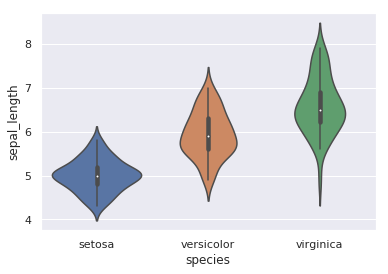

In [6]:
import seaborn as sns
sns.set()
iris = sns.load_dataset("iris")
ax = sns.violinplot(x="species", y="sepal_length", data=iris)

### Data pre-processing

#### Standardisation

**Centring matrix**

$$\tilde {\mathbf X} = \mathbf{X C}_n$$
- $\mathbf C_n = \mathbf I_n - \frac{1}{n} \boldsymbol 1_n \boldsymbol 1_n^\top$
- $\mathbf C_n \mathbf C_n = \mathbf C_n$
- Multiply from the left instead removes the sample mean of each column

**Scaling to unit variance**

$$\mathbf z_i = \mathrm{diag} \left( \frac{1}{\mathrm{std}(\mathbf x)} \right) \tilde{\mathbf x}_i$$

#### Outlier detection and removal

- Turkey's fences $$[Q_1 - k(Q_3-Q_1), Q_3 + k(Q_3-Q_1)] = [Q_1 - k \mathrm{IQR}(x), Q_3 + k \mathrm{IQR}(x)]$$
    - $k \geq 0$ (most commonly $k=1.5$)
    - Used in [box plots](#Box-plot)

## Principal Component Analysis

### PCA by variance maximisation

#### Sequtial variance maximisation

\begin{align*}
\text{First PC: } & \begin{cases}
\underset{\mathbf w_1}{\text{maximise}} & \mathrm{Var}(z_1) = \mathrm{Var}(\mathbf w_1^\top \mathbf x) = \mathbf w_1^\top \boldsymbol\Sigma \mathbf w_1 \\
\text{subject to} & \| \mathbf w_1 \| = 1
\end{cases} \\
\text{Subsequent PCs: } & \begin{cases}
\underset{\mathbf w_m}{\text{maximise}} & \mathbf w_m^\top \boldsymbol\Sigma \mathbf w_m \\
\text{subject to} & \| \mathbf w_m \| = 1 \\
& \mathbf w_m^\top \mathbf w_1 = 0 \quad i = 1, \ldots, m-1
\end{cases}
\end{align*}

1. Let $\mathbf w_1 = \mathbf{Ua}$, then $\displaystyle \mathbf w_1^\top \boldsymbol\Sigma \mathbf w_1 = \sum_{i=1}^d a_i^2 \lambda_i$ and $\displaystyle \| \mathbf w_1 \| = \sum_{i=1}^d a_i^2 = 1$
1. $\mathbf a = (1, 0, \ldots, 0)^\top$ is the solution of the optimisation problem if $\lambda_1 > \lambda_i$
1. $\mathbf w_1 = \mathbf u_1 = \mathbf{Ue}_1$ is the first PC direction, with variance $\lambda_1$
1. For subsequent calculations, constraints $a_i=0 \ (i=1,\ldots,m-1)$ exist


- PCs (scores) uncorrelated: 
\begin{align*}
\mathbb E [z_i z_j] &= \mathbb E [\mathbf w_i^\top \mathbf{xx}^\top \mathbf w_j] \\
&= \mathbf w_i^\top \boldsymbol\Sigma \mathbf w_j \\
&= \mathbf e_i^\top \mathbf U^\top \mathbf U \boldsymbol\Lambda \mathbf U^\top \mathbf{Ue}_j \\
&= 0
\end{align*}
- Fraction of variance explained: $\displaystyle \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^d \lambda_i}$

#### Simultaneous variance maximisation

\begin{align*}
\underset{\mathbf w_1, \ldots, \mathbf w_k}{\text{maximise}} &\quad \sum_{i=1}^k \mathbf w_i^\top \boldsymbol\Sigma \mathbf w_i \\
\text{subject to} &\quad \| \mathbf w_i \| = 1 &\quad i = 1, \ldots, k \\
&\quad \mathbf w_i^\top \mathbf w_j = 0 &\quad i \neq j
\end{align*}

- Subtle techinical point: not using greedy algorithms as in [sequential approach](#PCA-by-variance-maximisation), which are not guaranteed to yeild optimal solutions
- However, same results as [sequential approach](#PCA-by-variance-maximisation)

### PCA by minimisation of approximation error

Approximation error: $\displaystyle \mathbb E \| \mathbf x - \mathbf{Px} \|^2 = \mathbb E \| \mathbf x - \mathbf W_k \mathbf W_k^\top \mathbf x \|^2 = \mathbb E \| \mathbf x - \sum_{i=1}^k \mathbf w_k \mathbf w_k^\top \mathbf x \|^2$
- $\underset{d\times k}{\mathbf W_k} = (\mathbf w_1, \ldots, \mathbf w_k)$, where $\mathbf w_i$ are orthogonal vectors spanning a $k$-dim subspace of $\mathbb R^d$

\begin{align*}
\underset{\mathbf w_1, \ldots, \mathbf w_k}{\text{minimise}} &\quad \mathbb E \| \mathbf x - \sum_{i=1}^k \mathbf w_k \mathbf w_k^\top \mathbf x \|^2 \\
\text{subject to} &\quad \| \mathbf w_i \| = 1 &\quad i = 1, \ldots, k \\
&\quad \mathbf w_i^\top \mathbf w_j = 0 &\quad i \neq j
\end{align*}

- Equivalent to [simultaneous variance maximisation](#Simultaneous-variance-maximisation)
- Optimal $\mathbf w_i$ are the first $k$ eigenvectors $\mathbf u_i$ of $\boldsymbol\Sigma$
- $\displaystyle \mathbb E \| \mathbf x - \sum_{i=1}^k \mathbf w_k \mathbf w_k^\top \mathbf x \|^2 = \sum_{i=k+1}^d \lambda_i$

### PCA by low rank matrix approximation

#### Approximating the data matrix

\begin{align*}
\underset{\mathbf M}{\text{minimise}} &\quad \| \mathbf X - \mathbf M \|_F^2 = \sum_{ij} \left( (\mathbf X)_{ij} - (\mathbf M)_{ij} \right)^2 \\
\text{subject to} &\quad \mathrm{rank}(\mathbf M) = k &\quad k<r=\mathrm{rank}(\mathbf X)
\end{align*}

- Optimal solution: $\hat{\mathbf X} = \mathbf U_k \mathbf S_k \mathbf V_k^\top$ (truncated singular value decomposition)
- Singular values relate to eigenvalues: $\displaystyle \lambda_i = \frac{s_i^2}{n}$
- Right singular vectors $\mathbf v_i$ are eigenvectors and hence PC directions
- PC scores: $\mathbf z_i = \mathbf{Xv}_i = \mathbf{USV}^\top \mathbf{Ve}_i = \mathbf{USe}_i = s_i \mathbf u_i$

#### Approximating the sample covariance matrix

\begin{align*}
\underset{\mathbf M}{\text{minimise}} &\quad \| \boldsymbol\Sigma - \mathbf M \|_F \\
\text{subject to} &\quad \mathrm{rank}(\mathbf M) = k &\quad k<r=\mathrm{rank}(\mathbf X) \\
&\quad \mathbf M^\top = \mathbf M
\end{align*}

- Optimal solution: $\hat{\boldsymbol\Sigma} = \mathbf V_k \boldsymbol\Lambda_k \mathbf V_k^\top$ (eigendecomposition)

#### Approximating the Gram matrix

1. Eigendecomposition: $\displaystyle \underset{n\times n}{\mathbf G} = \mathbf X \mathbf X^\top \overset{\text{SVD}}{=} (\mathbf{USV}^\top) (\mathbf{USV}^\top)^\top = \mathbf{USS}^\top \mathbf U^\top = \mathbf U \tilde{\boldsymbol\Lambda} \mathbf U^\top$
1. Approximate $\mathbf G$ like [sample cov](#Approximating-the-sample-covariance-matrix): $\displaystyle \hat{\mathbf G} = \sum_{i=1}^k s_i^2 \mathbf u_i \mathbf u_i^\top = \sum_{i=1}^k \mathbf z_i \mathbf z_i^\top$

### Probabilistic PCA

#### Probabilistic model

\begin{align*}
    \underset{K \times 1}{\mathbf z} &\sim \mathcal N(\mathbf 0, \mathbf I_K) \\
    \underset{D \times 1}{\boldsymbol\varepsilon} &\sim \mathcal N(\mathbf 0, \sigma^2 \mathbf I_D) \\
    \underset{D \times 1}{\mathbf x} &= \underset{D \times K}{\mathbf W} \ \underset{K \times 1}{\mathbf z} + \underset{D \times 1}{\boldsymbol\mu} + \underset{D \times 1}{\boldsymbol\varepsilon}
\end{align*}

#### Joint, conditional and observation distributions

\begin{align*}
p(\mathbf x | \mathbf z) &= \mathcal N(\mathbf x; \mathbf{Wz}+\boldsymbol\mu, \sigma^2 \mathbf I_D) \\
p(\mathbf x) &= \mathcal N(\mathbf x; \boldsymbol\mu, \mathbf{WW}^\top+\sigma^2 \mathbf I_D)
\end{align*}

#### Maximum likelihood

## Dimensionality Reduction

**Authors:** s1680642

**Licensing:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.